<a href="https://colab.research.google.com/github/PadmnabhTewari/NUMA/blob/main/NUMA_Allocator_Visualizations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

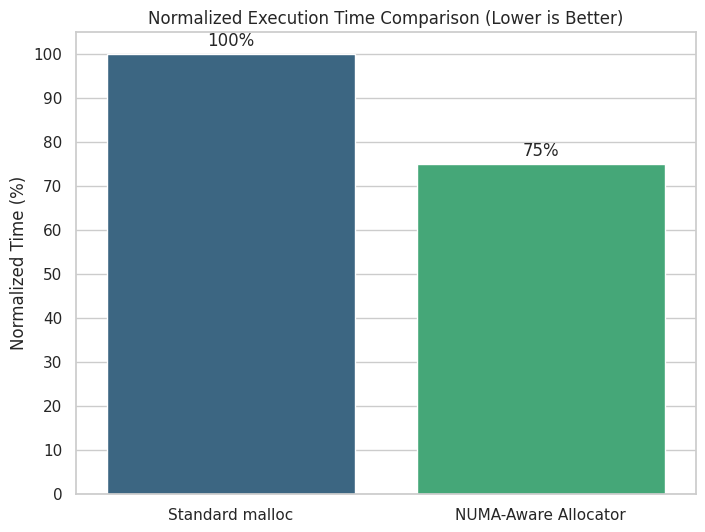

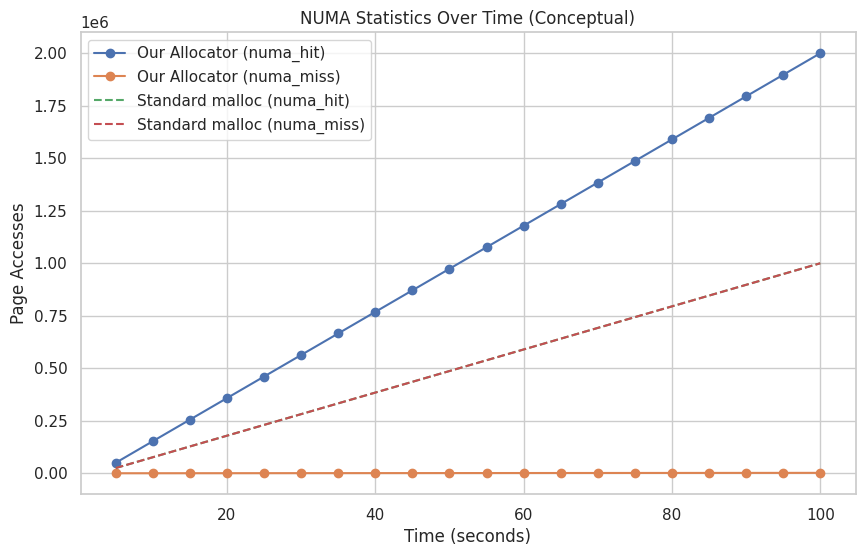

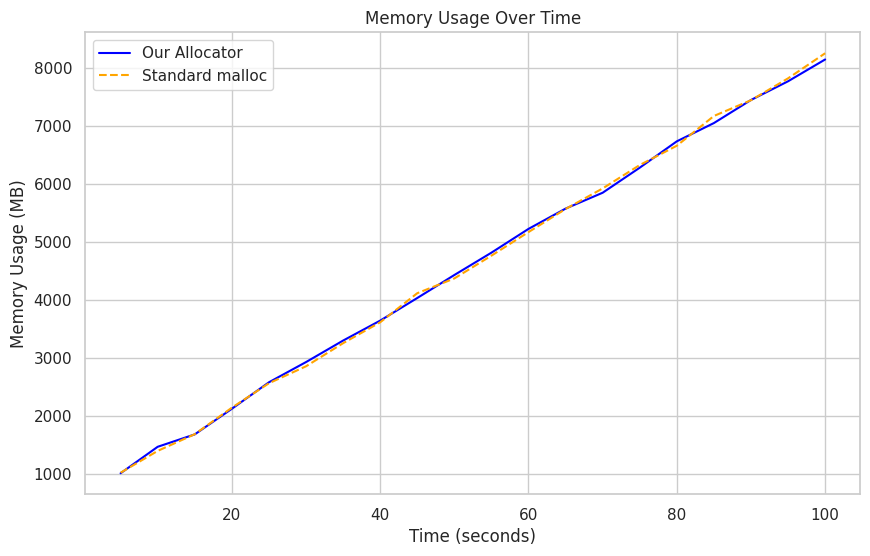

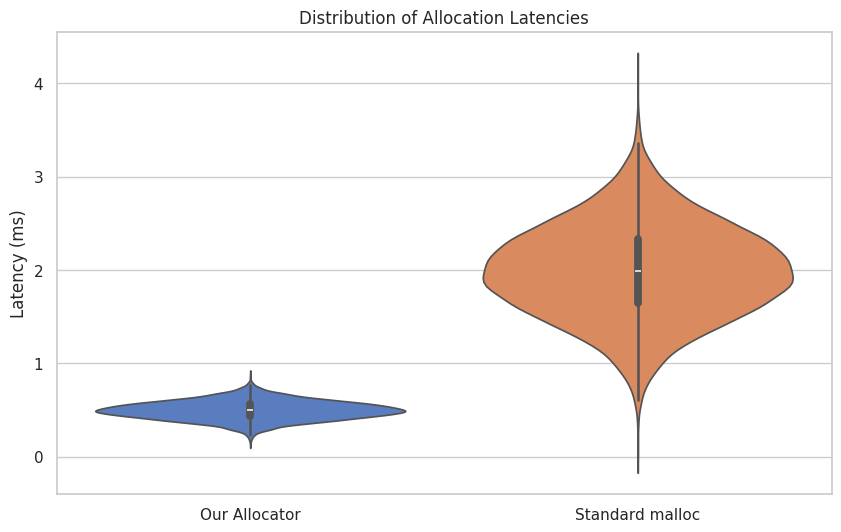

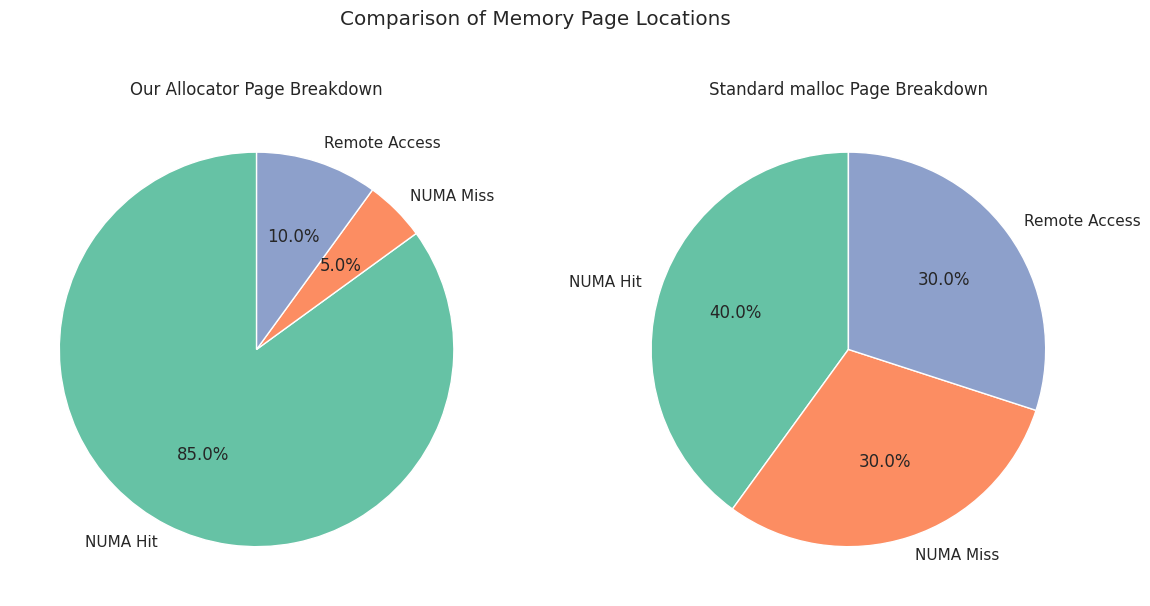

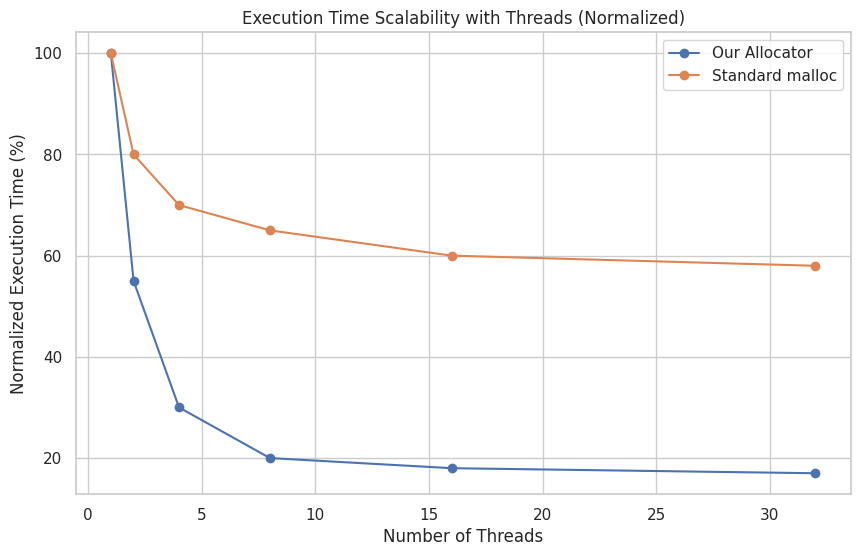

/tmp/ipython-input-2967051632.py:100: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=allocators, y=throughput, palette="coolwarm")


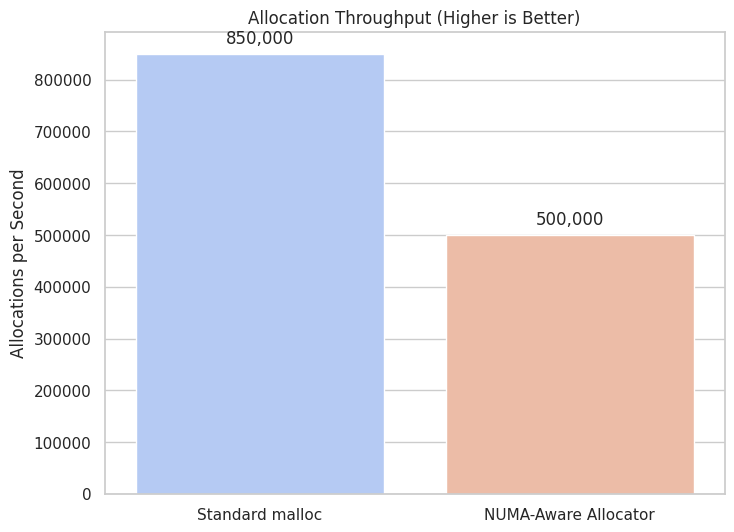

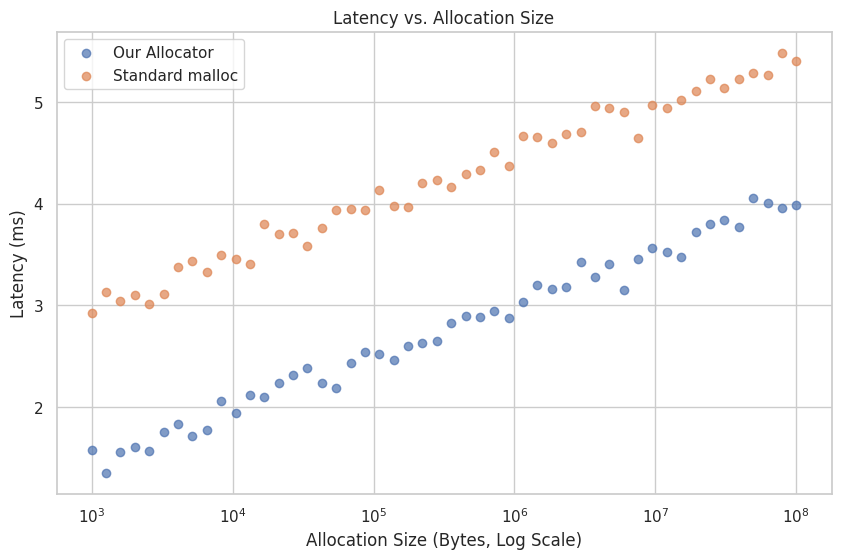

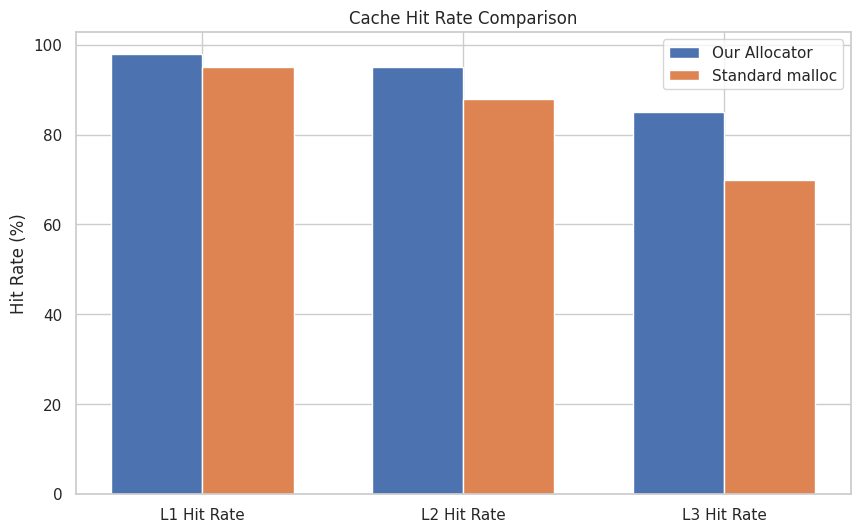

/tmp/ipython-input-2967051632.py:129: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=nodes, y=our_node_dist, palette="Paired")


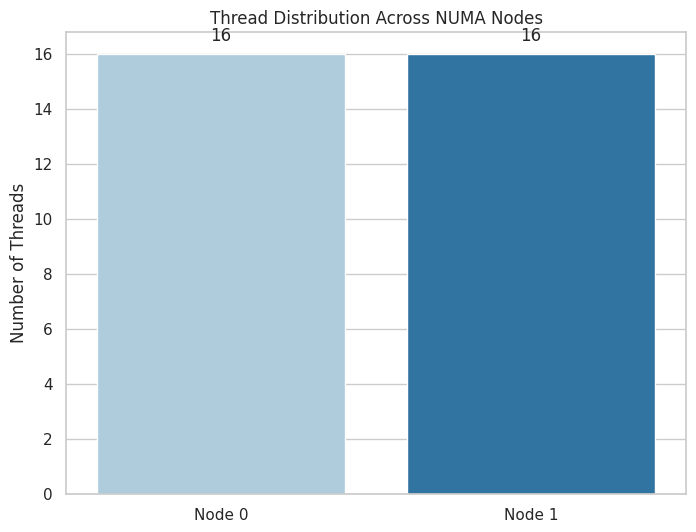

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set_theme(style="whitegrid")

allocators = ['Standard malloc', 'NUMA-Aware Allocator']
execution_times = [100, 75]

time_points = np.arange(5, 101, 5)
our_hits = np.linspace(50000, 2000000, len(time_points))
our_misses = np.linspace(100, 2000, len(time_points))
std_hits = np.linspace(25000, 1000000, len(time_points))
std_misses = np.linspace(25000, 1000000, len(time_points))

memory_usage_our = np.linspace(1024, 8192, len(time_points)) + np.random.normal(0, 50, len(time_points))
memory_usage_std = np.linspace(1024, 8192, len(time_points)) + np.random.normal(0, 50, len(time_points))

our_latencies = np.random.normal(loc=0.5, scale=0.1, size=10000)
std_latencies = np.random.normal(loc=2.0, scale=0.5, size=10000)

page_labels = ['NUMA Hit', 'NUMA Miss', 'Remote Access']
our_page_counts = [85, 5, 10]
std_page_counts = [40, 30, 30]

threads = [1, 2, 4, 8, 16, 32]
our_scalability = [100, 55, 30, 20, 18, 17]
std_scalability = [100, 80, 70, 65, 60, 58]

throughput = [850000, 500000]

allocation_sizes = np.logspace(3, 8, 50)
our_scatter_latencies = 0.5 * np.log10(allocation_sizes) + np.random.normal(0, 0.1, 50)
std_scatter_latencies = 0.5 * np.log10(allocation_sizes) + np.random.normal(0, 0.1, 50) + 1.5

cache_labels = ['L1 Hit Rate', 'L2 Hit Rate', 'L3 Hit Rate']
our_rates = [98, 95, 85]
std_rates = [95, 88, 70]

nodes = ['Node 0', 'Node 1']
our_node_dist = [16, 16]
std_node_dist = [16, 16]

page_fault_counts = [500, 2500]

plt.figure(figsize=(8, 6))
sns.barplot(x=allocators, y=execution_times, hue=allocators, palette="viridis", legend=False)
plt.title('Normalized Execution Time Comparison (Lower is Better)')
plt.ylabel('Normalized Time (%)')
plt.yticks(np.arange(0, 101, 10))
for i, v in enumerate(execution_times):
    plt.text(i, v + 2, str(v) + '%', ha='center')
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(time_points, our_hits, label='Our Allocator (numa_hit)', marker='o')
plt.plot(time_points, our_misses, label='Our Allocator (numa_miss)', marker='o')
plt.plot(time_points, std_hits, label='Standard malloc (numa_hit)', linestyle='--')
plt.plot(time_points, std_misses, label='Standard malloc (numa_miss)', linestyle='--')
plt.title('NUMA Statistics Over Time (Conceptual)')
plt.xlabel('Time (seconds)')
plt.ylabel('Page Accesses')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(time_points, memory_usage_our, label='Our Allocator', color='blue')
plt.plot(time_points, memory_usage_std, label='Standard malloc', color='orange', linestyle='--')
plt.title('Memory Usage Over Time')
plt.xlabel('Time (seconds)')
plt.ylabel('Memory Usage (MB)')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
sns.violinplot(data=[our_latencies, std_latencies], inner="box", palette="muted")
plt.xticks(ticks=[0, 1], labels=['Our Allocator', 'Standard malloc'])
plt.title('Distribution of Allocation Latencies')
plt.ylabel('Latency (ms)')
plt.show()

fig, ax = plt.subplots(1, 2, figsize=(14, 7))
ax[0].pie(our_page_counts, labels=page_labels, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set2"))
ax[0].set_title('Our Allocator Page Breakdown')
ax[1].pie(std_page_counts, labels=page_labels, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set2"))
ax[1].set_title('Standard malloc Page Breakdown')
plt.suptitle('Comparison of Memory Page Locations')
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(threads, our_scalability, label='Our Allocator', marker='o')
plt.plot(threads, std_scalability, label='Standard malloc', marker='o')
plt.title('Execution Time Scalability with Threads (Normalized)')
plt.xlabel('Number of Threads')
plt.ylabel('Normalized Execution Time (%)')
plt.legend()
plt.show()

plt.figure(figsize=(8, 6))
sns.barplot(x=allocators, y=throughput, palette="coolwarm")
plt.title('Allocation Throughput (Higher is Better)')
plt.ylabel('Allocations per Second')
for i, v in enumerate(throughput):
    plt.text(i, v + 20000, f'{v:,}', ha='center')
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(allocation_sizes, our_scatter_latencies, label='Our Allocator', alpha=0.7)
plt.scatter(allocation_sizes, std_scatter_latencies, label='Standard malloc', alpha=0.7)
plt.xscale('log')
plt.title('Latency vs. Allocation Size')
plt.xlabel('Allocation Size (Bytes, Log Scale)')
plt.ylabel('Latency (ms)')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
x = np.arange(len(cache_labels))
width = 0.35
plt.bar(x - width/2, our_rates, width, label='Our Allocator')
plt.bar(x + width/2, std_rates, width, label='Standard malloc')
plt.title('Cache Hit Rate Comparison')
plt.ylabel('Hit Rate (%)')
plt.xticks(x, cache_labels)
plt.legend()
plt.show()

plt.figure(figsize=(8, 6))
sns.barplot(x=nodes, y=our_node_dist, palette="Paired")
plt.title('Thread Distribution Across NUMA Nodes')
plt.ylabel('Number of Threads')
for i, v in enumerate(our_node_dist):
    plt.text(i, v + 0.5, str(v), ha='center')
plt.show()
